This notebook is based upon https://www.geeksforgeeks.org/monte-carlo-integration-in-python/

In Monte Carlo methods **random numbers** are used to compute integals using the following idea:

$<f(x)>\equiv\frac{1}{b-a}\int^b_a f(x) dx$

$<f(x)>({b-a})=\int^b_a f(x) dx$

but $<f(x)>\approx\frac{1}{N}\Sigma_{i=1}^N f(x_i)$

and therefore $(b-a) \frac{1}{N}\Sigma_{i=1}^N f(x_i) \approx \int^b_a f(x) dx$

where N is the number of points where the function is computed and that will be selected randomly in the interval $[a,b]$.


Let us use this method to compute $\int_0^\pi sin(x) dx = 2$

(note that Monte Carlo methods are typically more useful when doing integrals in 2 or more dimensions since one can get an accurate solution with fewer points and hence a lower computational cost than other numerical methods)

## 3) integrazione con METODO DI MONTECARLO:
Qui di seguito si usa il metodo di montecarlo per l'integrazione del seno tra 0 e $\pi$.

Viene mostrato come usare tale metodo con python (si può usare anche MATLAB ecc.)


In [1]:
#queste righe di codice non sono state spiegate (solo i punti 1 e 2 perchè più semplici e immediati)

#si sfrutta la potenza dei numeri random.

import numpy as np

# limits of integration
a = 0
b = np.pi # gets the value of pi
N = 1000 #number of points for the integration (the larger the better)

# array of zeros of length N
ar = np.zeros(N)

# iterating over each value of ar and filling
# it with a random value between the limits a
# and b
for i in range (len(ar)):   #CLICLO FOR con RANGE (che va da 0 a 100 in qst caso, e quindi si incrementa da sola)
    ar[i] = np.random.uniform(a,b)    #distribuzione unif casuale tra 0 e pigrco,
    #quindi ad esempio per ar[0] ho un numero casuale compreso tra 0 e pi e cosi via.

# variable to store sum of the functions of
# different values of x
integral = 0.0

# function to calculate the sin of a particular
# value of x
def f(x):
    return np.sin(x)

# iterates and sums up values of different functions
# of x
for i in ar:  #prende i numeri random calcolati prima uno per uno nell'array e li passa alla funzione.
    integral += f(i)  #va a sommare tutti i numeri casuali(passati ora a funzione) calcolati nel primo for.

# we get the answer by the formula derived adobe
ans = (b-a)/N*integral

# prints the solution
print ("The value calculated by monte carlo integration is {}.".format(ans))


The value calculated by monte carlo integration is 2.0174240696007146.


In [2]:
?np.random

We can also have a look at the value obtained for the integral when changing $N$. This will give us a visual representation of the most probable result.

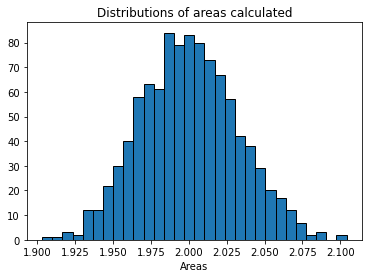

In [19]:
#ORA PLOTTIAMO QUANTO VISTO SOPRA IN UN GRAFICO:

#import matplotlib.pyplot as plt

# list to store all the values for plotting
plt_vals = []

# we iterate through all the values to generate
# multiple results and show whose intensity is
# the most.
for i in range(N):

    #array of zeros of length N
    ar = np.zeros(N)

    # iterating over each Value of ar and filling it
    # with a randome value between the limits a and b
    for i in range (len(ar)):                           #IMPORTANTE QUESTO MODO DI FARE IL FOR CON RANGE e L'ARRAY
        ar[i] = np.random.uniform(a,b)

    # variable to store sum of the functions of different
    # values of x
    integral = 0.0

    # iterates and sums up values of different functions
    # of x
    for i in ar:
        integral += f(i)

    # we get the answer by the formula derived adobe
    ans = (b-a)/float(N)*integral

    # appends the solution to a list for plotting the graph
    plt_vals.append(ans)                                     #APPPEND METHOD .append()

# details of the plot to be generated
# sets the title of the plot
plt.title("Distributions of areas calculated")

# 3 parameters (array on which histogram needs
# to be made, bins, separators colour between the
# beams)
plt.hist (plt_vals, bins=30, ec="black")

# sets the label of the x-axis of the plot
plt.xlabel("Areas")
plt.show() # shows the plot


From scipy we can also load the integrate module to compute the integral in a different way using scipy.integrate https://docs.scipy.org/doc/scipy/reference/reference/integrate.html#module-scipy.integrate

## 1) CALCOLO NUMERICO DELL'INTEGRALE DEL SENO:

In [ ]:

import numpy as np
import scipy.integrate as integrate  #importiamo il modulo integrate della lib scipy

In [16]:
?integrate

In [6]:
def f(x):
    return np.sin(x)

a=0
b=np.pi

In [7]:
result = integrate.quad(f, a, b) #integrate.quad: presa una funzione f nei due estremi a e b e ne calcola i rettangoli
#quindi lo calcola numericamente, maggiori sono i punti maggiori sono i rettangoli migliore è l'approx.
# per maggiori dettagli fare " ?integrate.quad " 
print(result)

#il secondo numero che salta fuori è la stima dell'errore.

#python può fare integrali anche in più dimensioni

(2.0, 2.220446049250313e-14)


## 2) CALCOLO SIMBOLICO DELL'INTEGRALE DEL SENO CON SYMPY:
il calcolo simbolico è tipo Mathematica, qui sfrutto la lib sympy.
Mathematica è più user frendly ma è a pagamento, sympy è open-source ed è gratuito!

Se l'integrabile non è risolvibile analiticamente va risolto numericamente con scypy.


We can also compute the integral analytically using sympy
https://www.sympy.org/en/index.html

In [8]:
import sympy

In [9]:
?sympy

In [15]:
z = sympy.symbols('z')   #z è la variabile (un simbolo in questo caso) di integrazione.
sympy.integrate(sympy.sin(z), (z,a,b))

#attenzione non ho messo np.sin come funzione ma ho messo la funzione simbolica sympy.sin. Infatti np.sin mi 
#restituisce numeri essendo numerica.

#va a risolvere ANALITICAMENTE come farebbe Mathematica.

2.00000000000000